# Survey Data Processing

Proyek ini bertujuan untuk memproses dan menganalisis data survei guna memperoleh insight terkait tingkat kepuasan konsumen.

### Persiapan Data

Proyek ini menggunakan pandas untuk manipulasi dan analisis data serta numpy untuk operasi numerik

In [12]:
# import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data yang digunakan berasal dari https://data.world/aiyanasmith/electronic-city/workspace/file?filename=ElectronicsCity.xlsx

Terdapat 2 dataset:
- sales_data berisi data penjualan perangkat elektronik
- satisfaction_data berisi survey kepuasan 

In [3]:
# Load sales_data
sales_data = pd.read_excel('sales_data.xlsx')

# Load satisfaction_data
satisfaction_data = pd.read_excel('satisfaction_data.xlsx')

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Invoice Number     536 non-null    int64         
 1   Store ID           536 non-null    int64         
 2   Store City         536 non-null    object        
 3   Store State        536 non-null    object        
 4   Salesperson ID     536 non-null    object        
 5   Sale Date          536 non-null    datetime64[ns]
 6   Manufacturer ID    536 non-null    int64         
 7   Manufacturer Name  536 non-null    object        
 8   Product ID         536 non-null    int64         
 9   Product Type       536 non-null    object        
 10  Sale Amount        536 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 46.2+ KB


In [5]:
satisfaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Store City               448 non-null    object        
 1   Salesperson              448 non-null    object        
 2   Invoice Date             448 non-null    datetime64[ns]
 3   Invoice ID               448 non-null    float64       
 4   Customer Satisfaction    449 non-null    object        
 5   Sales Training Approach  448 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 21.7+ KB


Tipe data pada masing-masing kolom sudah sesuai. Namun, terdapat beberapa kolom yang sama pada kedua dataset, yaitu 'Store City', 'Salesperson', dan 'Invoice Date'. Karena isi dari kolom-kolom tersebut identik, kolom tersebut dihapus dari satisfaction_data sebelum penggabungan. Untuk mempermudah analisis, kedua dataset kemudian digabungkan menjadi satu DataFrame berdasarkan kolom 'Invoice Number'.

In [6]:
# Drop kolom pada satisfaction_data yang juga muncul di sales_data (kecuali kolom Invoice ID)
satisfaction_data.drop(columns=['Store City', 'Salesperson', 'Invoice Date'], inplace=True)

# Rename kolom 'Invoice ID' pada 'satisfaction_data' ke 'Invoice Number'
satisfaction_data.rename(columns={'Invoice ID': 'Invoice Number'}, inplace=True)

# Gabungkan kedua data
df = pd.merge(sales_data, satisfaction_data, on='Invoice Number', how='left')

In [7]:
df.head()

,Invoice Number,Store ID,Store City,Store State,Salesperson ID,Sale Date,Manufacturer ID,Manufacturer Name,Product ID,Product Type,Sale Amount,Customer Satisfaction,Sales Training Approach
0,1,3,Tillamook,OR,CJ,2015-01-01 18:00:00,1,Hewlett-Packard,3,Desktop,649,1,Bi-annual Training
1,2,1,Vancouver,WA,Emily,2015-01-01 18:00:00,7,LexMark,5,Inkjet Printer,239,2,Weekly Training
2,2,1,Vancouver,WA,Emily,2015-01-01 18:00:00,7,LexMark,5,Inkjet Printer,239,2,Weekly Training
3,3,1,Vancouver,WA,Jesse,2015-01-01 18:00:00,2,Compaq,3,Desktop,699,3,Weekly Training
4,4,2,Salem,OR,Jessica,2015-01-01 18:00:00,1,Hewlett-Packard,3,Desktop,649,1,Self Training


### Data Cleaning

Cek Missing Value

In [8]:
df.isnull().sum()

Invoice Number             0
Store ID                   0
Store City                 0
Store State                0
Salesperson ID             0
Sale Date                  0
Manufacturer ID            0
Manufacturer Name          0
Product ID                 0
Product Type               0
Sale Amount                0
Customer Satisfaction      0
Sales Training Approach    0
dtype: int64

Tidak ada missing value pada dataset :)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice Number           536 non-null    int64         
 1   Store ID                 536 non-null    int64         
 2   Store City               536 non-null    object        
 3   Store State              536 non-null    object        
 4   Salesperson ID           536 non-null    object        
 5   Sale Date                536 non-null    datetime64[ns]
 6   Manufacturer ID          536 non-null    int64         
 7   Manufacturer Name        536 non-null    object        
 8   Product ID               536 non-null    int64         
 9   Product Type             536 non-null    object        
 10  Sale Amount              536 non-null    int64         
 11  Customer Satisfaction    536 non-null    object        
 12  Sales Training Approach  536 non-nul

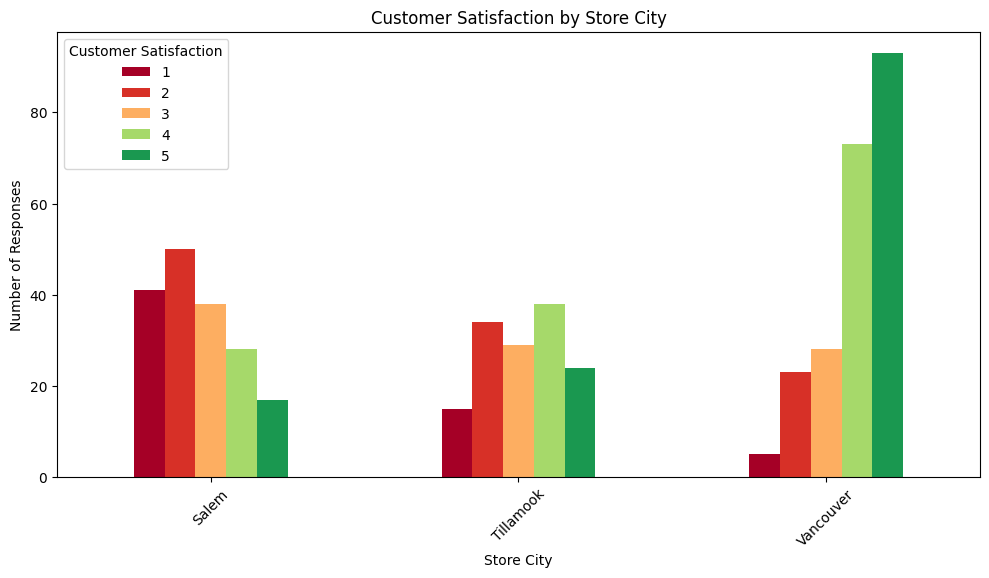

In [18]:
pivot = df.pivot_table(index='Store City', columns='Customer Satisfaction', 
                       values='Invoice Number', aggfunc='count', fill_value=0)

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=False, color = ['#a50026', '#d73027', '#fdae61', '#a6d96a', '#1a9850'], figsize=(10, 6))

plt.title('Customer Satisfaction by Store City')
plt.xlabel('Store City')
plt.ylabel('Number of Responses')
plt.legend(title='Customer Satisfaction')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

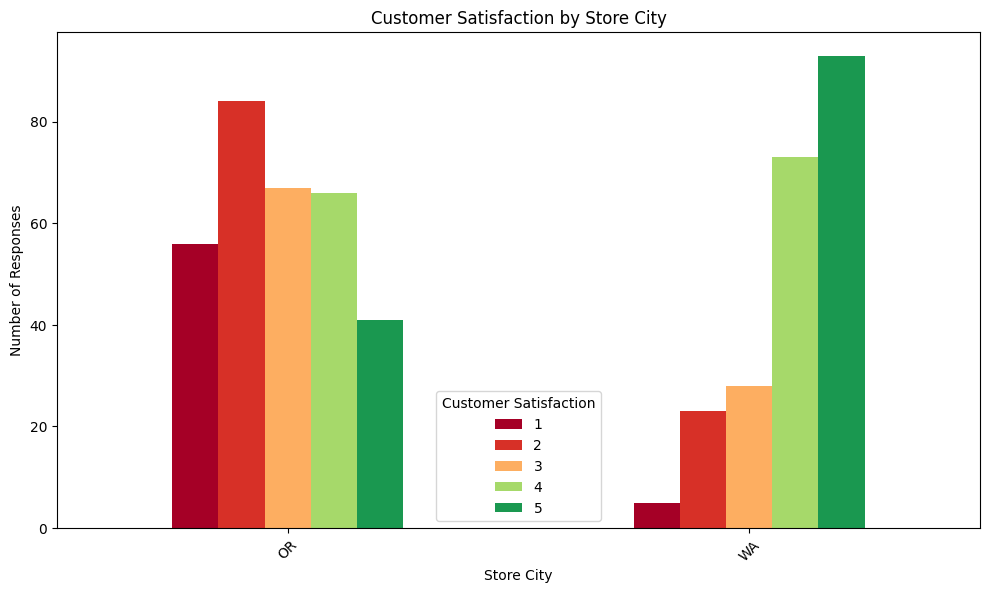

In [22]:
pivot = df.pivot_table(index='Store State', columns='Customer Satisfaction', 
                       values='Invoice Number', aggfunc='count', fill_value=0)

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=False, color = ['#a50026', '#d73027', '#fdae61', '#a6d96a', '#1a9850'], figsize=(10, 6))

plt.title('Customer Satisfaction by Store City')
plt.xlabel('Store City')
plt.ylabel('Number of Responses')
plt.legend(title='Customer Satisfaction')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()